In [1]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('mode.chained_assignment',None)

In [3]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
grouped = tips['tip'].groupby(tips['sex'])
grouped

In [5]:
grouped.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [7]:
date_mean = tips['tip'].groupby([tips['day'],tips['time']]).mean()
date_mean

day   time  
Thur  Lunch     2.767705
      Dinner    3.000000
Fri   Lunch     2.382857
      Dinner    2.940000
Sat   Dinner    2.993103
Sun   Dinner    3.255132
Name: tip, dtype: float64

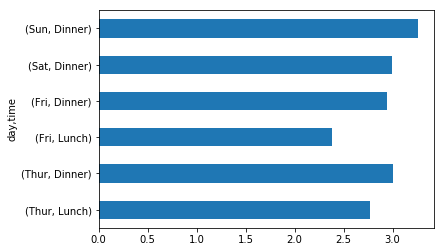

In [8]:
date_mean.plot(kind='barh')

In [9]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [14]:
for name,group in tips.groupby(tips['sex']):
    print(name)
    print(group)

Male
     total_bill   tip   sex smoker   day    time  size
1         10.34  1.66  Male     No   Sun  Dinner     3
2         21.01  3.50  Male     No   Sun  Dinner     3
3         23.68  3.31  Male     No   Sun  Dinner     2
5         25.29  4.71  Male     No   Sun  Dinner     4
6          8.77  2.00  Male     No   Sun  Dinner     2
7         26.88  3.12  Male     No   Sun  Dinner     4
8         15.04  1.96  Male     No   Sun  Dinner     2
9         14.78  3.23  Male     No   Sun  Dinner     2
10        10.27  1.71  Male     No   Sun  Dinner     2
12        15.42  1.57  Male     No   Sun  Dinner     2
13        18.43  3.00  Male     No   Sun  Dinner     4
15        21.58  3.92  Male     No   Sun  Dinner     2
17        16.29  3.71  Male     No   Sun  Dinner     3
19        20.65  3.35  Male     No   Sat  Dinner     3
20        17.92  4.08  Male     No   Sat  Dinner     2
23        39.42  7.58  Male     No   Sat  Dinner     4
24        19.82  3.18  Male     No   Sat  Dinner     2
25   

In [15]:
tips.groupby(tips['sex']).size()

sex
Male      157
Female     87
dtype: int64

In [16]:
tips.groupby(tips['sex']).count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,157,157,157,157,157,157
Female,87,87,87,87,87,87


In [19]:
smoker_mean = tips.groupby('smoker').mean()
smoker_mean

,total_bill,tip,size
smoker,,,
Yes,20.756344,3.008710,2.408602
No,19.188278,2.991854,2.668874


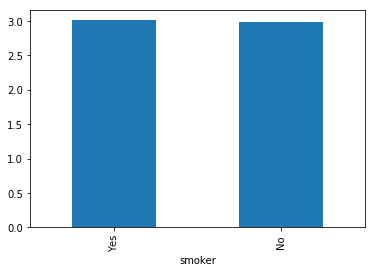

In [21]:
smoker_mean['tip'].plot(kind='bar')

In [24]:
size_mean1 = tips['tip'].groupby(tips['size']).mean()
size_mean1

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

In [25]:
size_mean2 = tips.groupby('size')['tip'].mean()  #语法糖
size_mean2

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

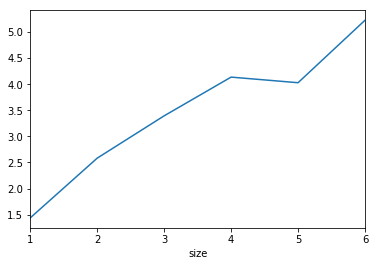

In [27]:
size_mean2.plot()

In [29]:
df = DataFrame(np.arange(16).reshape(4,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [30]:
list1 = ['a','b','a','b']

In [32]:
df.groupby(list1).sum()

,0,1,2,3
a,8,10,12,14
b,16,18,20,22


In [33]:
df = DataFrame(np.random.normal(size=(6,6)),index=['a','b','c','A','B','C'])
df

,0,1,2,3,4,5
a,0.031512,-0.896280,-0.000981,0.558886,-1.574150,0.030435
b,0.774907,0.020968,0.575220,-0.566894,1.326251,0.775521
c,1.437972,-0.699240,-1.064924,0.235661,1.841803,1.238480
A,-1.756554,0.652186,1.149668,0.192652,2.202044,0.366539
B,-0.575227,0.299196,-0.120483,-2.665255,0.432872,1.627597
C,0.481407,-0.983928,1.270371,-1.581129,-1.568339,-2.122324


In [34]:
dict1 = {
    'a':'one',
    'A':'one',
    'b':'two',
    'B':'two',
    'c':'three',
    'C':'three'
}

In [35]:
df.groupby(dict1).sum()

,0,1,2,3,4,5
one,-1.725042,-0.244095,1.148687,0.751538,0.627894,0.396974
three,1.919380,-1.683169,0.205448,-1.345468,0.273464,-0.883844
two,0.199680,0.320164,0.454738,-3.232148,1.759122,2.403117


In [37]:
df = DataFrame(np.random.randn(4,4))
df

,0,1,2,3
0,0.803694,-1.242886,0.393840,-1.137829
1,1.048137,-0.931402,-0.262153,0.609839
2,0.135432,0.739250,-1.685265,1.562063
3,-0.863777,-0.687589,1.901485,-0.224359


In [38]:
def jug(x):
    if x >= 0:
        return 'a'
    else:
        return 'b'

In [41]:
df[3].groupby(df[3].map(jug)).sum()

3
a    2.171902
b   -1.362188
Name: 3, dtype: float64

In [42]:
df = DataFrame(np.arange(16).reshape(4,4),
              index=[['one','one','two','two'],['a','b','a','b']],
              columns=[['apple','apple','orange','orange'],['red','green','red','green']])
df

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [43]:
df.groupby(level=1).sum()

apple       orange      
    red green    red green
a     8    10     12    14
b    16    18     20    22

In [44]:
df.groupby(level=1,axis=1).sum()

green  red
one a      4    2
    b     12   10
two a     20   18
    b     28   26

In [47]:
max_tip = tips.groupby('sex')['tip'].max()
max_tip

sex
Male      10.0
Female     6.5
Name: tip, dtype: float64

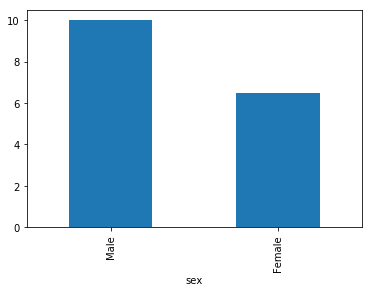

In [48]:
max_tip.plot(kind='bar')

In [50]:
df = DataFrame(np.arange(16).reshape(4,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [53]:
list1 = ['a','b','a','b']
df.groupby(list1).quantile(0.5)

0.5,0,1,2,3
a,4.0,5.0,6.0,7.0
b,8.0,9.0,10.0,11.0


In [4]:
def get_range(x):
    return x.max()-x.min()

In [5]:
tips_range = tips.groupby('sex')['tip'].agg(get_range)
tips_range

sex
Male      9.0
Female    5.5
Name: tip, dtype: float64

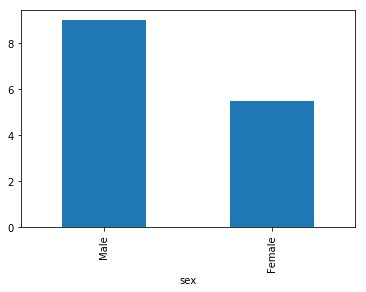

In [6]:
tips_range.plot(kind='bar')

In [13]:
tips.groupby(['sex','smoker'])['tip'].agg(['mean','std',get_range])

mean       std  get_range
sex    smoker                               
Male   Yes     3.051167  1.500120       9.00
       No      3.113402  1.489559       7.75
Female Yes     2.931515  1.219916       5.50
       No      2.773519  1.128425       4.20

In [15]:
tips.groupby(['sex','smoker'])['tip'].agg([('tip_mean','mean'),('Range',get_range)])

tip_mean  Range
sex    smoker                 
Male   Yes     3.051167   9.00
       No      3.113402   7.75
Female Yes     2.931515   5.50
       No      2.773519   4.20

In [16]:
tips.groupby(['day','time'])['total_bill','tip'].agg([('tip_mean','mean'),('Range',get_range)])

total_bill              tip      
              tip_mean  Range  tip_mean Range
day  time                                    
Thur Lunch   17.664754  35.60  2.767705  5.45
     Dinner  18.780000   0.00  3.000000  0.00
Fri  Lunch   12.845714   7.69  2.382857  1.90
     Dinner  19.663333  34.42  2.940000  3.73
Sat  Dinner  20.441379  47.74  2.993103  9.00
Sun  Dinner  21.410000  40.92  3.255132  5.49

In [17]:
tips.groupby(['day','time'])['total_bill','tip'].agg({'total_bill':'sum','tip':'mean'})

total_bill       tip
day  time                        
Thur Lunch      1077.55  2.767705
     Dinner       18.78  3.000000
Fri  Lunch        89.92  2.382857
     Dinner      235.96  2.940000
Sat  Dinner     1778.40  2.993103
Sun  Dinner     1627.16  3.255132

In [18]:
tips.groupby(['day','time'])['total_bill','tip'].agg({'total_bill':['sum','mean'],'tip':'mean'})

total_bill                  tip
                   sum       mean      mean
day  time                                  
Thur Lunch     1077.55  17.664754  2.767705
     Dinner      18.78  18.780000  3.000000
Fri  Lunch       89.92  12.845714  2.382857
     Dinner     235.96  19.663333  2.940000
Sat  Dinner    1778.40  20.441379  2.993103
Sun  Dinner    1627.16  21.410000  3.255132

In [23]:
no_index = tips.groupby(['sex','smoker'],as_index=False)['tip'].mean()
no_index

,sex,smoker,tip
0,Male,Yes,3.051167
1,Male,No,3.113402
2,Female,Yes,2.931515
3,Female,No,2.773519


In [24]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [28]:
df = DataFrame(tips.groupby('sex')['tip'].mean())
df

,tip
sex,
Male,3.089618
Female,2.833448


In [29]:
new_tips = pd.merge(tips,df,left_on='sex',right_index=True)
new_tips.head()

,total_bill,tip_x,sex,smoker,day,time,size,tip_y
0,16.99,1.01,Female,No,Sun,Dinner,2,2.833448
4,24.59,3.61,Female,No,Sun,Dinner,4,2.833448
11,35.26,5.00,Female,No,Sun,Dinner,4,2.833448
14,14.83,3.02,Female,No,Sun,Dinner,2,2.833448
16,10.33,1.67,Female,No,Sun,Dinner,3,2.833448


In [32]:
tips.groupby('sex')['tip'].transform('mean')

0      2.833448
1      3.089618
2      3.089618
3      3.089618
4      2.833448
5      3.089618
6      3.089618
7      3.089618
8      3.089618
9      3.089618
10     3.089618
11     2.833448
12     3.089618
13     3.089618
14     2.833448
15     3.089618
16     2.833448
17     3.089618
18     2.833448
19     3.089618
20     3.089618
21     2.833448
22     2.833448
23     3.089618
24     3.089618
25     3.089618
26     3.089618
27     3.089618
28     3.089618
29     2.833448
         ...   
214    2.833448
215    2.833448
216    3.089618
217    3.089618
218    3.089618
219    2.833448
220    3.089618
221    2.833448
222    3.089618
223    2.833448
224    3.089618
225    2.833448
226    2.833448
227    3.089618
228    3.089618
229    2.833448
230    3.089618
231    3.089618
232    3.089618
233    3.089618
234    3.089618
235    3.089618
236    3.089618
237    3.089618
238    2.833448
239    3.089618
240    2.833448
241    3.089618
242    3.089618
243    2.833448
Name: tip, Length: 244, 

# apply方法

In [10]:
def top(x,n=5):
    return x.sort_values(by='tip',ascending=False)[-n:]

In [11]:
tips.groupby('sex').apply(top)

total_bill   tip     sex smoker  day    time  size
sex                                                           
Male   43         9.68  1.32    Male     No  Sun  Dinner     2
       235       10.07  1.25    Male     No  Sat  Dinner     2
       75        10.51  1.25    Male     No  Sat  Dinner     2
       237       32.83  1.17    Male    Yes  Sat  Dinner     2
       236       12.60  1.00    Male    Yes  Sat  Dinner     2
Female 215       12.90  1.10  Female    Yes  Sat  Dinner     2
       0         16.99  1.01  Female     No  Sun  Dinner     2
       111        7.25  1.00  Female     No  Sat  Dinner     1
       67         3.07  1.00  Female    Yes  Sat  Dinner     1
       92         5.75  1.00  Female    Yes  Fri  Dinner     2

In [12]:
tips.groupby('sex',group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,size
43,9.68,1.32,Male,No,Sun,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
75,10.51,1.25,Male,No,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
215,12.90,1.10,Female,Yes,Sat,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2


In [18]:
data = {
    'name':['张三', '李四', 'peter', '王五', '小明', '小红'],
    'sex':['female', 'female', 'male', 'male','male','female'],
    'math':[67, 72, np.nan, 82, 90, np.nan]
}
df = DataFrame(data)
df['math'] = df['math']
df

,math,name,sex
0,67.0,张三,female
1,72.0,李四,female
2,NaN,peter,male
3,82.0,王五,male
4,90.0,小明,male
5,NaN,小红,female


In [19]:
df.fillna(df['math'].mean())

,math,name,sex
0,67.00,张三,female
1,72.00,李四,female
2,77.75,peter,male
3,82.00,王五,male
4,90.00,小明,male
5,77.75,小红,female


In [20]:
f = lambda x: x.fillna(x.mean())
df.groupby('sex').apply(f)

math   name     sex
sex                          
female 0  67.0     张三  female
       1  72.0     李四  female
       5  69.5     小红  female
male   2  86.0  peter    male
       3  82.0     王五    male
       4  90.0     小明    male

In [25]:
tips.pivot_table?

In [22]:
tips.pivot_table(values='tip',index='sex',columns='smoker')

smoker,Yes,No
sex,,
Male,3.051167,3.113402
Female,2.931515,2.773519


In [23]:
tips.pivot_table(values='tip',index='sex',columns='smoker',aggfunc='sum')

smoker,Yes,No
sex,,
Male,183.07,302.00
Female,96.74,149.77


In [24]:
tips.pivot_table(values='tip',index='sex',columns='smoker',aggfunc='sum',margins=True)

smoker,Yes,No,All
sex,,,
Male,183.07,302.00,485.07
Female,96.74,149.77,246.51
All,279.81,451.77,731.58


In [33]:
cross_table = pd.crosstab(index=tips['day'],columns=tips['size'])
cross_table

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [36]:
df = cross_table.div(cross_table.sum(1),axis=0)
df

size,1,2,3,4,5,6
day,,,,,,
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158


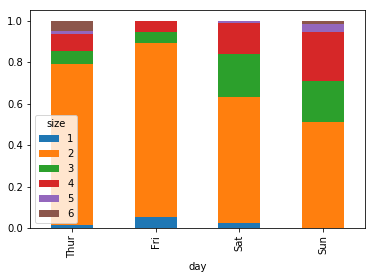

In [37]:
df.plot(kind='bar',stacked = True)